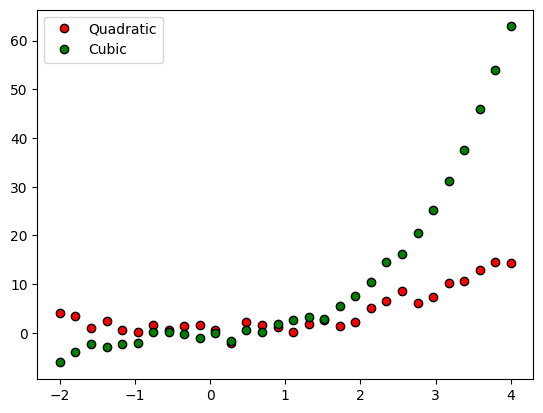

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n  = 30
x  = np.linspace(-2,4,n)
y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)

plt.plot(x, y1, 'ko', markerfacecolor='r')
plt.plot(x, y2, 'ko', markerfacecolor='g')
plt.legend(('Quadratic', 'Cubic'))
plt.show()

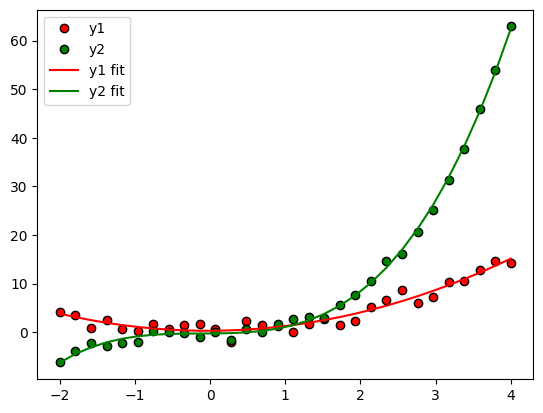

In [2]:
pterms = np.polyfit(x, y1, 2)
yHat1 = np.polyval(pterms,x)

pterms = np.polyfit(x, y2, 3)
yHat2 = np.polyval(pterms,x)

plt.plot(x, y1, 'ko', markerfacecolor='r', label='y1')
plt.plot(x, y2, 'ko', markerfacecolor='g', label='y2')

plt.plot(x, yHat1,'r', label='y1 fit')
plt.plot(x, yHat2,'g', label='y2 fit')
plt.legend()
plt.show()

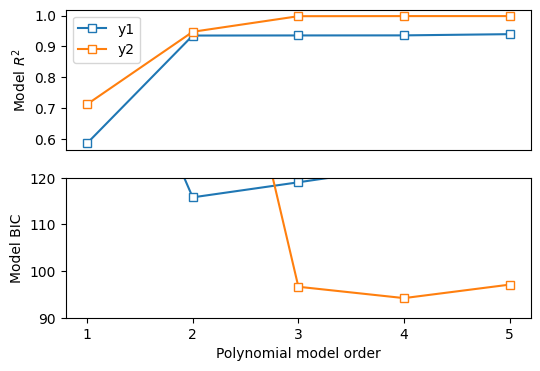

In [4]:
orders = np.arange(1,6)

r2 = np.zeros((2,len(orders)))
sse = np.zeros((2,len(orders)))

for oi in range(len(orders)):
    
    pterms = np.polyfit(x,y1,orders[oi])
    yHat = np.polyval(pterms,x)
    
    ss_eta = sum((y1-yHat)**2)
    ss_tot = sum((y1-np.mean(y1))**2)
    r2[0,oi] = 1 - ss_eta/ss_tot
    sse[0,oi] = ss_eta
    
    
    pterms = np.polyfit(x,y2,orders[oi])
    yHat   = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1 - ss_eta/ss_tot
    sse[1,oi] = ss_eta



fig,ax = plt.subplots(2,1,figsize=(6,4))

ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))



bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

ax[1].set_ylim([90,120])

plt.show()